In [98]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [99]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [100]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [101]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [103]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)    #in each element in Z if less than zero returns 0 greater than 0 returns Z

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A 
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))    #creates correctly sized matrix
    one_hot_Y[np.arange(Y.size), Y] = 1         #for each row go to coloum specified by label in y and set it to 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0                                 #if element is greater converts to 1

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) *  deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [104]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
    
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ",i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [105]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[0 9 9 ... 3 2 9] [4 7 0 ... 2 5 0]
Accuracy:  0.09012195121951219
Iteration:  50
[4 7 0 ... 2 0 0] [4 7 0 ... 2 5 0]
Accuracy:  0.49221951219512194
Iteration:  100
[4 7 0 ... 2 3 0] [4 7 0 ... 2 5 0]
Accuracy:  0.6545121951219512
Iteration:  150
[4 7 0 ... 2 3 0] [4 7 0 ... 2 5 0]
Accuracy:  0.726609756097561
Iteration:  200
[4 7 0 ... 2 3 0] [4 7 0 ... 2 5 0]
Accuracy:  0.7658780487804878
Iteration:  250
[4 7 0 ... 2 3 0] [4 7 0 ... 2 5 0]
Accuracy:  0.7909512195121952
Iteration:  300
[4 7 0 ... 2 3 0] [4 7 0 ... 2 5 0]
Accuracy:  0.8095609756097562
Iteration:  350
[4 7 0 ... 2 3 0] [4 7 0 ... 2 5 0]
Accuracy:  0.8235121951219512
Iteration:  400
[4 7 0 ... 2 3 0] [4 7 0 ... 2 5 0]
Accuracy:  0.8334878048780487
Iteration:  450
[4 7 0 ... 2 3 0] [4 7 0 ... 2 5 0]
Accuracy:  0.8419024390243902


In [116]:
def make_predictions(X, W1, b1, W2, b2):
    _,_,_, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2 , b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("label: ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

Prediction:  [4]
label:  4


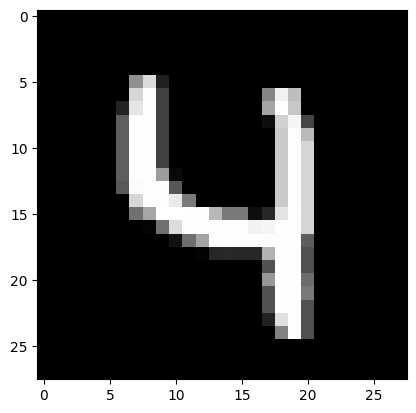

Prediction:  [7]
label:  7


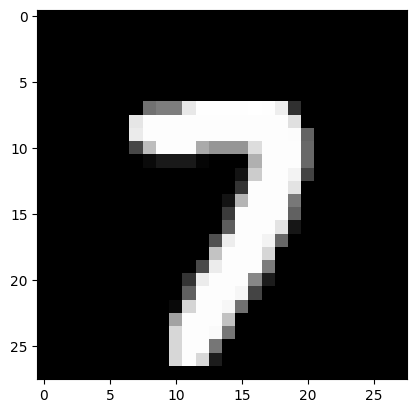

Prediction:  [0]
label:  0


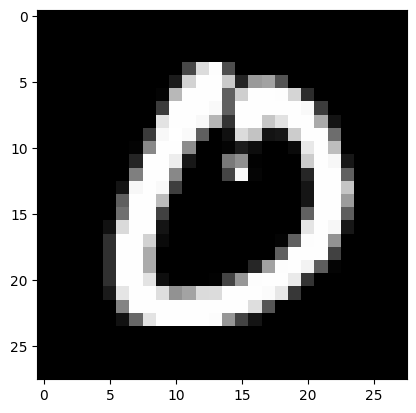

Prediction:  [3]
label:  3


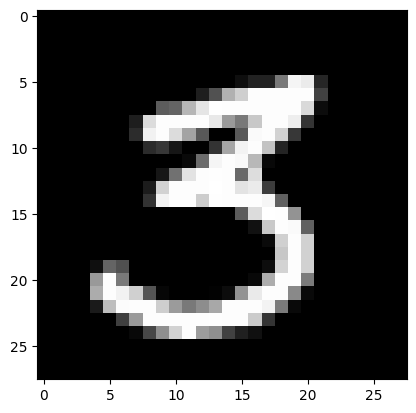

In [117]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [118]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 4 1 6 1 3 0 4 0 1 4 7 3 0 3 9 1 9 6 1 2 9 9 9 1 8 6 2 4 3 4 0 8 3 4 0 5
 9 2 5 5 6 9 9 0 8 7 3 3 5 8 6 3 6 4 7 8 1 1 9 8 3 7 4 5 7 4 2 2 2 8 4 0 3
 1 6 8 1 3 8 6 9 5 9 6 3 9 8 5 4 1 1 3 6 5 5 4 3 8 0 6 9 9 1 2 8 1 3 6 2 2
 0 2 2 6 1 5 8 1 4 1 9 3 0 2 1 2 3 2 8 0 0 5 2 1 2 1 7 4 9 5 9 8 9 1 7 7 1
 1 1 9 7 4 7 2 9 0 1 1 6 5 6 2 8 0 4 9 0 8 7 1 4 2 3 6 6 2 0 2 9 4 0 1 6 9
 0 5 6 2 7 3 6 3 0 5 4 4 6 9 2 8 6 4 1 2 3 6 3 7 5 8 4 2 2 0 9 8 7 8 9 0 5
 2 7 5 8 8 2 5 2 1 8 7 3 5 3 3 3 9 2 6 3 9 8 7 9 0 2 1 7 2 1 3 4 9 8 5 3 9
 2 2 6 6 4 8 6 3 3 7 3 3 4 6 8 8 7 7 6 5 0 0 3 0 6 8 9 8 1 5 7 4 7 8 8 6 5
 7 9 4 7 9 4 8 5 7 9 2 2 7 1 2 6 6 9 7 4 4 4 9 0 0 0 1 8 4 5 3 1 7 3 7 3 2
 4 3 9 1 9 6 9 6 7 1 5 0 3 8 6 0 3 8 2 8 2 6 1 8 4 3 4 0 4 8 7 1 4 0 0 9 5
 6 6 7 4 9 9 8 8 4 6 6 6 4 6 3 0 0 3 5 3 1 7 3 2 9 2 7 2 5 4 9 4 2 1 5 6 7
 5 2 9 1 4 1 8 1 6 5 9 1 2 2 2 5 1 4 6 6 6 6 8 8 1 0 0 9 9 2 4 3 3 9 9 2 6
 7 5 5 7 0 0 3 6 2 8 1 2 9 2 7 8 5 8 5 4 1 3 6 8 2 2 1 7 6 3 0 4 8 2 3 4 7
 8 7 8 0 1 5 0 0 9 0 9 3 

0.87